In [1]:
import pickle
from pprint import pprint
import pandas as pd

In [2]:
with open("/content/drive/MyDrive/Colab Notebooks/cleaned_data.pk", "rb") as f:
    data = pickle.load(f)
    
data.reset_index(drop=True, inplace=True)
print(data.head())
print(data.info())

         Date User timetype   time         Message
0  2020-02-29  조은영       오후   9:26              사진
1  2020-02-29  조은영       오후   9:26       넘 많이 쓴다아아
2  2020-02-29  조은영       오후   9:38  재정관리와 자기관리를 위해
3  2020-03-01  조은영       오전  12:09         안녕히주무세요
4  2020-03-01  손정희       오전  12:09            이모티콘
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3961 non-null   object
 1   User      3961 non-null   object
 2   timetype  3961 non-null   object
 3   time      3961 non-null   object
 4   Message   3961 non-null   object
dtypes: object(5)
memory usage: 154.9+ KB
None


In [3]:
# 시간정보 열 datetime 정보로 변환
data['Date'] = pd.to_datetime(data['Date'])
# 인덱스 넣기
data = data.set_index('Date')
data.head()

,User,timetype,time,Message
Date,,,,
2020-02-29,조은영,오후,9:26,사진
2020-02-29,조은영,오후,9:26,넘 많이 쓴다아아
2020-02-29,조은영,오후,9:38,재정관리와 자기관리를 위해
2020-03-01,조은영,오전,12:09,안녕히주무세요
2020-03-01,손정희,오전,12:09,이모티콘


In [4]:
data.tail()

,User,timetype,time,Message
Date,,,,
2021-01-31,조은정,오전,2:00,사진
2021-01-31,조은정,오전,2:00,근데너무소액이라
2021-01-31,조은정,오전,2:01,아 자동걸어놓고 빠지는바람에 다시 주었어
2021-01-31,조은정,오전,2:01,근데 리플모야 무서웤
2021-01-31,조은정,오전,2:01,하락장때 줍줍하기 잘했닼


In [5]:
year2020 = data['2020-02-29' : '2020-12-31']
year2021 = data['2021-01-01' : '2021-01-31']

In [6]:
# 제대로 분리되었나 확인
print(year2020.head())
print(year2021.head())

           User timetype   time         Message
Date                                           
2020-02-29  조은영       오후   9:26              사진
2020-02-29  조은영       오후   9:26       넘 많이 쓴다아아
2020-02-29  조은영       오후   9:38  재정관리와 자기관리를 위해
2020-03-01  조은영       오전  12:09         안녕히주무세요
2020-03-01  손정희       오전  12:09            이모티콘
           User  ...                                            Message
Date             ...                                                   
2021-01-01   쪼아  ...  해피뉴이어 다들 새해복많이 받으시고 운수 대통하시고 항상 건강하고 맛있는 하루 가득하시길
2021-01-01   쪼아  ...                                               이모티콘
2021-01-01  조은정  ...                                          새해복많이받으세요
2021-01-01  손정희  ...                                                 사진
2021-01-01  손정희  ...                                                 사진

[5 rows x 4 columns]


In [7]:
slice0 = [msg for msg in list(year2020['Message'])]
slice1 = [msg for msg in list(year2021['Message'])]

In [8]:
print(slice0[:10])
print(slice1[:10])

['사진', '넘 많이 쓴다아아', '재정관리와 자기관리를 위해', '안녕히주무세요', '이모티콘', '차이나 게이트가 난리네요', '희연이는 부모결혼24주년이라고 오늘 이벤트했나보드라', '왕', '그날 시간비워놓아야겠당', '5월 20일이었나요']
['해피뉴이어 다들 새해복많이 받으시고 운수 대통하시고 항상 건강하고 맛있는 하루 가득하시길', '이모티콘', '새해복많이받으세요', '사진', '사진', '사진 2장', '사진 4장', '사진', '내일이면 될까 어쩌면 모레쯤 될지도', '울강쥐 어제 나랑 ']


In [9]:
import nltk

total_tokens = [token for doc in slice0 for token in doc.split()]
print(len(total_tokens))

10177


In [10]:
text = nltk.Text(total_tokens, name='NMSC')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))

7131
[('사진', 524),
 ('엄마', 46),
 ('동영상', 46),
 ('아빠', 42),
 ('2장', 40),
 ('이모티콘', 39),
 ('이제', 39),
 ('오늘', 37),
 ('다', 37),
 ('네', 35)]


In [11]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


Unknown system... sorry~~~~


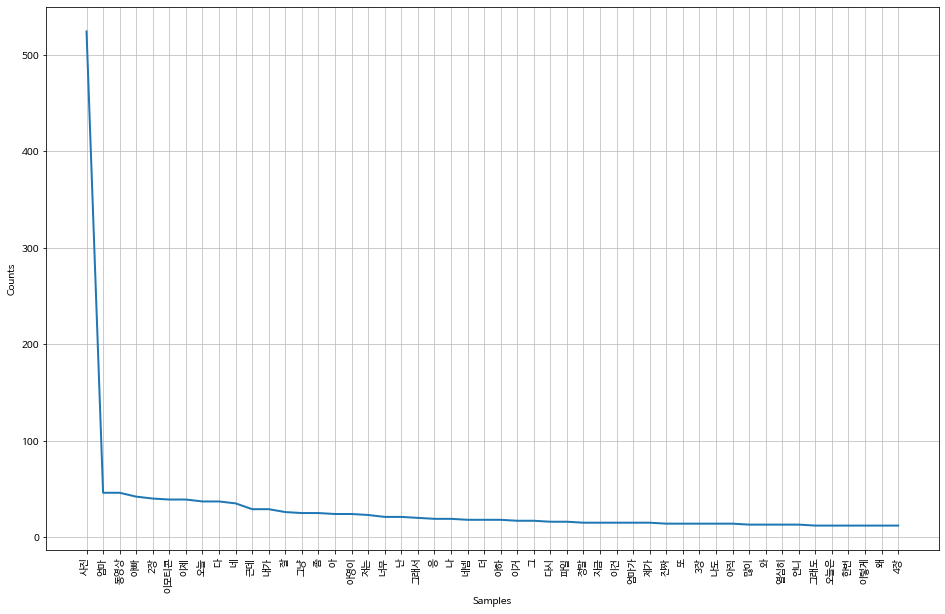

In [12]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')


if platform.system() == 'Darwin':
    rc('font', family='NanumBarunGothic')
elif platform.system() == 'Windows':
    rc('font', family='NanumBarunGothic')
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(50)

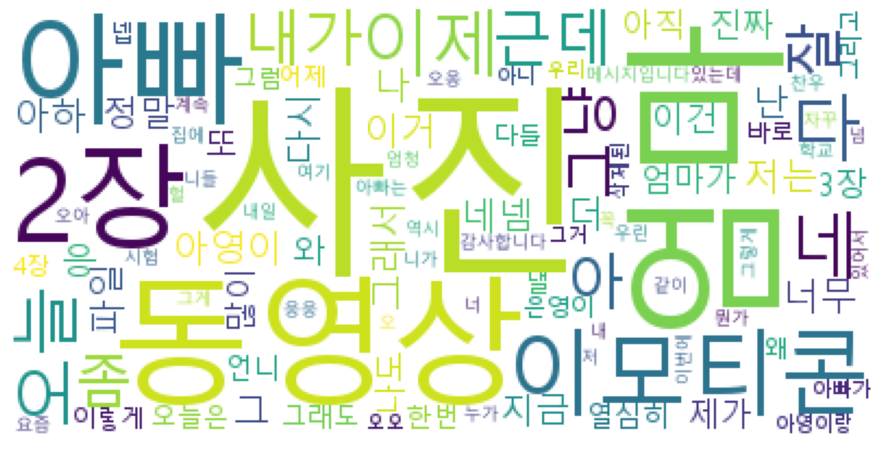

In [13]:
from wordcloud import WordCloud

wc = text.vocab().most_common(100)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/content/drive/MyDrive/Colab Notebooks/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(wc))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()